In [75]:
import pandas as pd
import numpy as np
import os

In [76]:
repo_root = os.popen('git rev-parse --show-toplevel').read().strip()

In [77]:
data_folder = os.path.join(repo_root, 'multi-parameter-estimation', 'data')

# Get list of data directories
data_dirs = os.listdir(data_folder)
data_dirs = [d for d in data_dirs if os.path.isdir(os.path.join(data_folder, d))]
data_dirs.sort()
data_dirs

['2025-05-23--16h-54m-21s',
 '2025-05-23--16h-54m-26s',
 '2025-05-23--16h-54m-30s',
 '2025-05-23--16h-54m-34s',
 '2025-05-23--16h-54m-37s',
 '2025-05-23--16h-54m-41s',
 '2025-05-23--16h-54m-45s',
 '2025-05-23--16h-54m-49s',
 '2025-05-23--16h-54m-53s',
 '2025-05-23--16h-54m-57s',
 '2025-05-23--16h-55m-01s',
 '2025-05-23--16h-55m-05s',
 '2025-05-23--16h-55m-08s',
 '2025-05-23--16h-55m-12s',
 '2025-05-23--16h-55m-16s',
 '2025-05-23--16h-55m-20s',
 '2025-05-23--16h-55m-24s',
 '2025-05-23--16h-55m-28s',
 '2025-05-23--16h-55m-32s',
 '2025-05-23--16h-55m-36s',
 '2025-05-23--16h-55m-40s',
 '2025-05-23--16h-55m-44s',
 '2025-05-23--16h-55m-47s',
 '2025-05-23--16h-55m-51s',
 '2025-05-23--16h-55m-55s',
 '2025-05-23--16h-55m-59s',
 '2025-05-23--16h-56m-03s',
 '2025-05-23--16h-56m-07s',
 '2025-05-23--16h-56m-11s',
 '2025-05-23--16h-56m-15s',
 '2025-05-23--16h-56m-19s',
 '2025-05-23--16h-56m-23s',
 '2025-05-23--16h-56m-27s',
 '2025-05-23--16h-56m-31s',
 '2025-05-23--16h-56m-35s',
 '2025-05-23--16h-56

In [78]:
def load_estimates_and_params(data_dir):
    params = pd.read_csv(os.path.join(data_folder, data_dir, "params.csv"))
    estimates = pd.read_csv(os.path.join(data_folder, data_dir, "estimators.csv"))
    estimates["data_dir"] = data_dir
    estimates["theta"] = params["theta"].values[0]
    estimates["delta_phi"] = params["delta_phi"].values[0]
    estimates["repetitions"] = params["repetitions"].values[0]
    return estimates

# Load estimates and parameters for each data directory
estimates_list = []
for data_dir in data_dirs:
    # Skip the directories with no estimates
    if not os.path.exists(os.path.join(data_folder, data_dir, "theta_delta_phi_estimates_n=40.csv")):
        continue
    estimates = load_estimates_and_params(data_dir)
    estimates_list.append(estimates)
# Concatenate all estimates into a single DataFrame
estimates_df = pd.concat(estimates_list, ignore_index=True)
estimates_df

,data_dir,C,DB_H,DB_V,SB,N,theta_estimate,delta_phi_estimate,theta,delta_phi,repetitions
0,2025-05-23--16h-54m-21s,2.0,38.0,0.0,0.0,40.0,0.317560,1.570796,0.000000,0,100
1,2025-05-23--16h-54m-21s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,0.000000,0,100
2,2025-05-23--16h-54m-21s,2.0,78.0,0.0,0.0,80.0,0.224075,1.570796,0.000000,0,100
3,2025-05-23--16h-54m-30s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,0.106495,0,100
4,2025-05-23--16h-54m-30s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,0.106495,0,100
...,...,...,...,...,...,...,...,...,...,...,...
23359,2025-05-23--19h-08m-07s,6.0,0.0,193.0,1.0,200.0,2.876240,1.183200,3.141593,0,5000
23360,2025-05-23--19h-08m-07s,5.0,0.0,195.0,0.0,200.0,2.917517,1.570796,3.141593,0,5000
23361,2025-05-23--19h-08m-07s,3.0,0.0,196.0,1.0,200.0,2.941258,1.047198,3.141593,0,5000
23362,2025-05-23--19h-08m-07s,5.5,0.0,194.0,0.5,200.0,2.896027,1.277954,3.141593,0,5000


In [79]:
estimates_df["theta_degrees"] = np.degrees(estimates_df["theta"])
estimates_df["delta_phi_degrees"] = np.degrees(estimates_df["delta_phi"])
estimates_df

,data_dir,C,DB_H,DB_V,SB,N,theta_estimate,delta_phi_estimate,theta,delta_phi,repetitions,theta_degrees,delta_phi_degrees
0,2025-05-23--16h-54m-21s,2.0,38.0,0.0,0.0,40.0,0.317560,1.570796,0.000000,0,100,0.000000,0.0
1,2025-05-23--16h-54m-21s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,0.000000,0,100,0.000000,0.0
2,2025-05-23--16h-54m-21s,2.0,78.0,0.0,0.0,80.0,0.224075,1.570796,0.000000,0,100,0.000000,0.0
3,2025-05-23--16h-54m-30s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,0.106495,0,100,6.101695,0.0
4,2025-05-23--16h-54m-30s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,0.106495,0,100,6.101695,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23359,2025-05-23--19h-08m-07s,6.0,0.0,193.0,1.0,200.0,2.876240,1.183200,3.141593,0,5000,180.000000,0.0
23360,2025-05-23--19h-08m-07s,5.0,0.0,195.0,0.0,200.0,2.917517,1.570796,3.141593,0,5000,180.000000,0.0
23361,2025-05-23--19h-08m-07s,3.0,0.0,196.0,1.0,200.0,2.941258,1.047198,3.141593,0,5000,180.000000,0.0
23362,2025-05-23--19h-08m-07s,5.5,0.0,194.0,0.5,200.0,2.896027,1.277954,3.141593,0,5000,180.000000,0.0


In [80]:
# only where repetitions > 1000
estimates_df = estimates_df[estimates_df["repetitions"] > 1000]

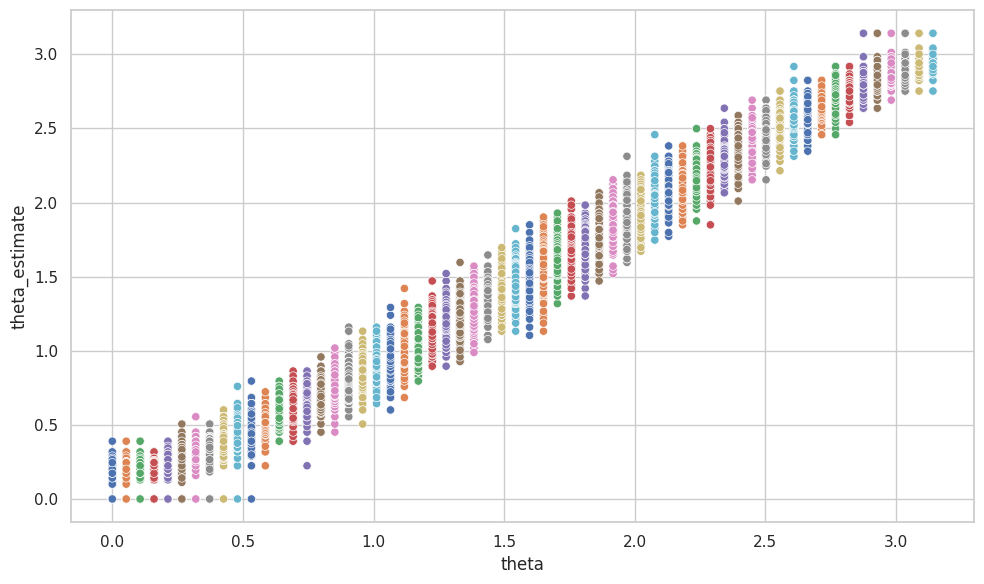

In [81]:
# plot the theta estimate against theta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_df, x="theta", y="theta_estimate", hue="data_dir", palette="deep")

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "theta_estimate_vs_true_theta.png")
plt.savefig(file_name, dpi=300)
plt.show()

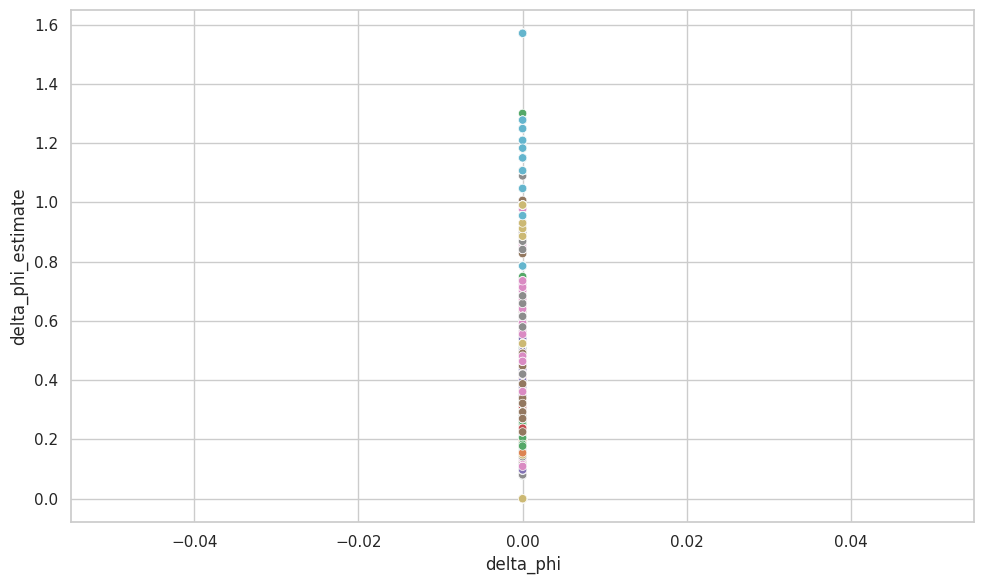

In [82]:
# plot the theta estimate against theta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_df, x="delta_phi", y="delta_phi_estimate", hue="data_dir", palette="deep")

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()

# save the figure
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "delta_phi_estimate_vs_true_delta_phi.png")
plt.savefig(file_name, dpi=300)
plt.show()

In [83]:
estimates_summary_df = estimates_df.groupby("data_dir").agg({
    "theta_estimate": ["mean", "std", "var"],
    "delta_phi_estimate": ["mean", "std", "var"],
    "theta": ["mean"],
    "delta_phi": ["mean"],
    "N": ["mean"]
}).reset_index().rename(columns={"data_dir": "Data Directory"})
estimates_summary_df

Data Directory theta_estimate                      \
                                      mean       std       var   
0   2025-05-23--17h-24m-53s       0.149732  0.100645  0.010129   
1   2025-05-23--17h-27m-00s       0.174618  0.095589  0.009137   
2   2025-05-23--17h-28m-51s       0.176823  0.095800  0.009178   
3   2025-05-23--17h-30m-41s       0.187405  0.088437  0.007821   
4   2025-05-23--17h-32m-32s       0.217284  0.085685  0.007342   
5   2025-05-23--17h-34m-23s       0.253472  0.085014  0.007227   
6   2025-05-23--17h-36m-14s       0.304604  0.070872  0.005023   
7   2025-05-23--17h-38m-05s       0.328839  0.072421  0.005245   
8   2025-05-23--17h-39m-56s       0.372597  0.074494  0.005549   
9   2025-05-23--17h-41m-47s       0.436162  0.072582  0.005268   
10  2025-05-23--17h-43m-38s       0.473480  0.081169  0.006588   
11  2025-05-23--17h-45m-29s       0.511122  0.068212  0.004653   
12  2025-05-23--17h-47m-20s       0.563852  0.071052  0.005048   
13  2025-05-23--17h-49m-11s       0.611319  0.071455  0.005106   
14  2025-05-23--17h-51m-02s       0.639952  0.080221  0.006435   
15  2025-05-23--17h-52m-53s       0.704425  0.073309  0.005374   
16  2025-05-23--17h-54m-44s       0.752415  0.079376  0.006301   
17  2025-05-23--17h-56m-35s       0.806471  0.082213  0.006759   
18  2025-05-23--17h-58m-27s       0.852722  0.083238  0.006929   
19  2025-05-23--18h-00m-17s       0.897162  0.076492  0.005851   
20  2025-05-23--18h-02m-09s       0.953210  0.091185  0.008315   
21  2025-05-23--18h-04m-00s       1.012536  0.094348  0.008901   
22  2025-05-23--18h-05m-51s       1.043852  0.081806  0.006692   
23  2025-05-23--18h-07m-42s       1.124991  0.084835  0.007197   
24  2025-05-23--18h-09m-34s       1.174130  0.087810  0.007711   
25  2025-05-23--18h-11m-25s       1.221830  0.094929  0.009012   
26  2025-05-23--18h-13m-17s       1.292000  0.088386  0.007812   
27  2025-05-23--18h-15m-08s       1.350161  0.092780  0.008608   
28  2025-05-23--18h-16m-59s       1.387214  0.088013  0.007746   
29  2025-05-23--18h-18m-47s       1.461561  0.094141  0.008863   
30  2025-05-23--18h-20m-26s       1.509724  0.093574  0.008756   
31  2025-05-23--18h-22m-05s       1.565543  0.106240  0.011287   
32  2025-05-23--18h-23m-43s       1.626514  0.093173  0.008681   
33  2025-05-23--18h-25m-22s       1.674669  0.099623  0.009925   
34  2025-05-23--18h-27m-01s       1.737848  0.095243  0.009071   
35  2025-05-23--18h-28m-41s       1.790608  0.094927  0.009011   
36  2025-05-23--18h-30m-20s       1.859939  0.096644  0.009340   
37  2025-05-23--18h-31m-59s       1.894954  0.099282  0.009857   
38  2025-05-23--18h-33m-37s       1.946500  0.088987  0.007919   
39  2025-05-23--18h-35m-16s       2.033582  0.089109  0.007940   
40  2025-05-23--18h-36m-55s       2.082501  0.089886  0.008079   
41  2025-05-23--18h-38m-34s       2.126319  0.083893  0.007038   
42  2025-05-23--18h-40m-12s       2.182041  0.084836  0.007197   
43  2025-05-23--18h-41m-51s       2.250750  0.087855  0.007719   
44  2025-05-23--18h-43m-30s       2.294206  0.082779  0.006852   
45  2025-05-23--18h-45m-09s       2.346050  0.087001  0.007569   
46  2025-05-23--18h-46m-47s       2.416074  0.076095  0.005790   
47  2025-05-23--18h-48m-26s       2.451426  0.081169  0.006588   
48  2025-05-23--18h-50m-05s       2.523288  0.073246  0.005365   
49  2025-05-23--18h-51m-43s       2.574147  0.073999  0.005476   
50  2025-05-23--18h-53m-21s       2.620380  0.082767  0.006850   
51  2025-05-23--18h-55m-00s       2.661562  0.070024  0.004903   
52  2025-05-23--18h-56m-38s       2.712411  0.078817  0.006212   
53  2025-05-23--18h-58m-17s       2.755450  0.065476  0.004287   
54  2025-05-23--18h-59m-55s       2.815363  0.075361  0.005679   
55  2025-05-23--19h-01m-34s       2.844708  0.077794  0.006052   
56  2025-05-23--19h-03m-12s       2.880577  0.072715  0.005287   
57  2025-05-23--19h-04m-50s       2.926092  0.083866  0.007033   
58  2025-05-23--19h-06m-29s       2.945642  0.092761 

In [84]:
estimates_summary_df["2_n_var"] = estimates_summary_df["N"]["mean"] * 2 * estimates_summary_df["theta_estimate"]["var"]
estimates_summary_df["theta_error"] = estimates_summary_df["theta_estimate"]["mean"] - estimates_summary_df["theta"]["mean"]
estimates_summary_df["root_n_theta_error"] = np.sqrt(estimates_summary_df["N"]["mean"]) * estimates_summary_df["theta_error"]
estimates_summary_df

Data Directory theta_estimate                      \
                                      mean       std       var   
0   2025-05-23--17h-24m-53s       0.149732  0.100645  0.010129   
1   2025-05-23--17h-27m-00s       0.174618  0.095589  0.009137   
2   2025-05-23--17h-28m-51s       0.176823  0.095800  0.009178   
3   2025-05-23--17h-30m-41s       0.187405  0.088437  0.007821   
4   2025-05-23--17h-32m-32s       0.217284  0.085685  0.007342   
5   2025-05-23--17h-34m-23s       0.253472  0.085014  0.007227   
6   2025-05-23--17h-36m-14s       0.304604  0.070872  0.005023   
7   2025-05-23--17h-38m-05s       0.328839  0.072421  0.005245   
8   2025-05-23--17h-39m-56s       0.372597  0.074494  0.005549   
9   2025-05-23--17h-41m-47s       0.436162  0.072582  0.005268   
10  2025-05-23--17h-43m-38s       0.473480  0.081169  0.006588   
11  2025-05-23--17h-45m-29s       0.511122  0.068212  0.004653   
12  2025-05-23--17h-47m-20s       0.563852  0.071052  0.005048   
13  2025-05-23--17h-49m-11s       0.611319  0.071455  0.005106   
14  2025-05-23--17h-51m-02s       0.639952  0.080221  0.006435   
15  2025-05-23--17h-52m-53s       0.704425  0.073309  0.005374   
16  2025-05-23--17h-54m-44s       0.752415  0.079376  0.006301   
17  2025-05-23--17h-56m-35s       0.806471  0.082213  0.006759   
18  2025-05-23--17h-58m-27s       0.852722  0.083238  0.006929   
19  2025-05-23--18h-00m-17s       0.897162  0.076492  0.005851   
20  2025-05-23--18h-02m-09s       0.953210  0.091185  0.008315   
21  2025-05-23--18h-04m-00s       1.012536  0.094348  0.008901   
22  2025-05-23--18h-05m-51s       1.043852  0.081806  0.006692   
23  2025-05-23--18h-07m-42s       1.124991  0.084835  0.007197   
24  2025-05-23--18h-09m-34s       1.174130  0.087810  0.007711   
25  2025-05-23--18h-11m-25s       1.221830  0.094929  0.009012   
26  2025-05-23--18h-13m-17s       1.292000  0.088386  0.007812   
27  2025-05-23--18h-15m-08s       1.350161  0.092780  0.008608   
28  2025-05-23--18h-16m-59s       1.387214  0.088013  0.007746   
29  2025-05-23--18h-18m-47s       1.461561  0.094141  0.008863   
30  2025-05-23--18h-20m-26s       1.509724  0.093574  0.008756   
31  2025-05-23--18h-22m-05s       1.565543  0.106240  0.011287   
32  2025-05-23--18h-23m-43s       1.626514  0.093173  0.008681   
33  2025-05-23--18h-25m-22s       1.674669  0.099623  0.009925   
34  2025-05-23--18h-27m-01s       1.737848  0.095243  0.009071   
35  2025-05-23--18h-28m-41s       1.790608  0.094927  0.009011   
36  2025-05-23--18h-30m-20s       1.859939  0.096644  0.009340   
37  2025-05-23--18h-31m-59s       1.894954  0.099282  0.009857   
38  2025-05-23--18h-33m-37s       1.946500  0.088987  0.007919   
39  2025-05-23--18h-35m-16s       2.033582  0.089109  0.007940   
40  2025-05-23--18h-36m-55s       2.082501  0.089886  0.008079   
41  2025-05-23--18h-38m-34s       2.126319  0.083893  0.007038   
42  2025-05-23--18h-40m-12s       2.182041  0.084836  0.007197   
43  2025-05-23--18h-41m-51s       2.250750  0.087855  0.007719   
44  2025-05-23--18h-43m-30s       2.294206  0.082779  0.006852   
45  2025-05-23--18h-45m-09s       2.346050  0.087001  0.007569   
46  2025-05-23--18h-46m-47s       2.416074  0.076095  0.005790   
47  2025-05-23--18h-48m-26s       2.451426  0.081169  0.006588   
48  2025-05-23--18h-50m-05s       2.523288  0.073246  0.005365   
49  2025-05-23--18h-51m-43s       2.574147  0.073999  0.005476   
50  2025-05-23--18h-53m-21s       2.620380  0.082767  0.006850   
51  2025-05-23--18h-55m-00s       2.661562  0.070024  0.004903   
52  2025-05-23--18h-56m-38s       2.712411  0.078817  0.006212   
53  2025-05-23--18h-58m-17s       2.755450  0.065476  0.004287   
54  2025-05-23--18h-59m-55s       2.815363  0.075361  0.005679   
55  2025-05-23--19h-01m-34s       2.844708  0.077794  0.006052   
56  2025-05-23--19h-03m-12s       2.880577  0.072715  0.005287   
57  2025-05-23--19h-04m-50s       2.926092  0.083866  0.007033   
58  2025-05-23--19h-06m-29s       2.945642  0.092761 

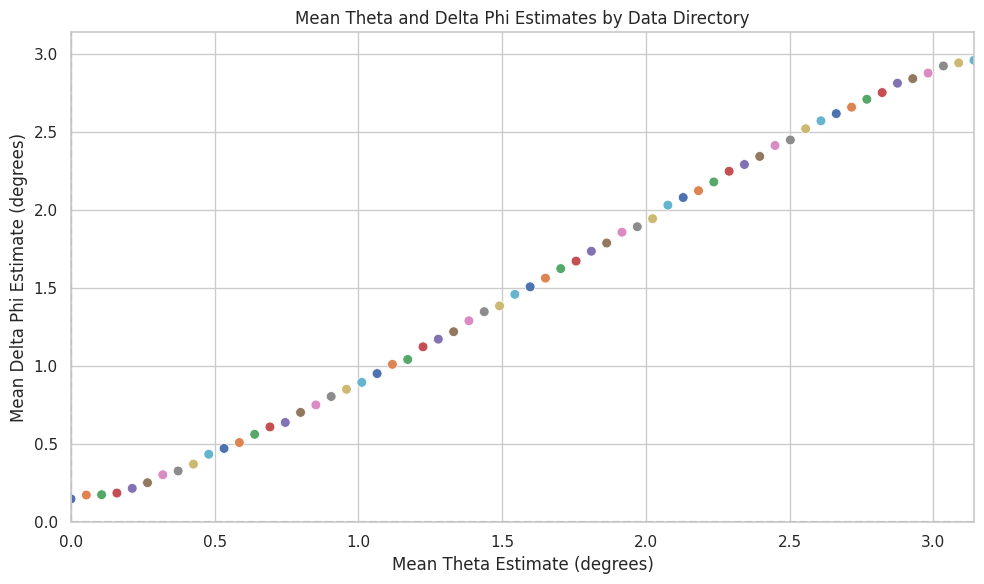

In [85]:
# plot the means as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"),
                y=("theta_estimate", "mean"),
                hue="Data Directory", palette="deep", s=50)
plt.title("Mean Theta and Delta Phi Estimates by Data Directory")
plt.xlabel("Mean Theta Estimate (degrees)")
plt.ylabel("Mean Delta Phi Estimate (degrees)")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(0, np.pi)
plt.ylim(0, np.pi)
# no legend
plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_delta_phi_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

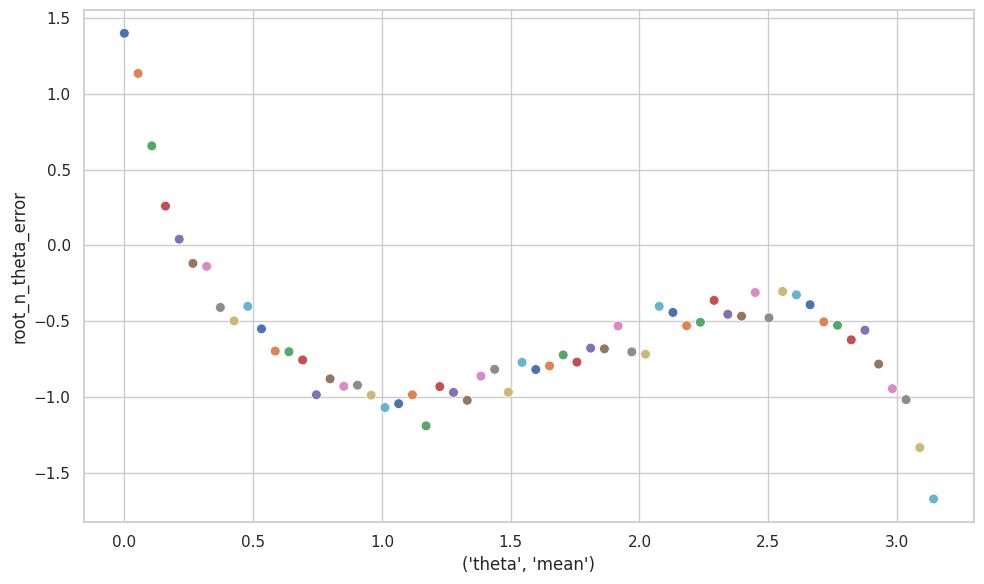

In [86]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"),
                y=("root_n_theta_error"),
                hue="Data Directory", palette="deep", s=50)


# no legend
plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_error_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

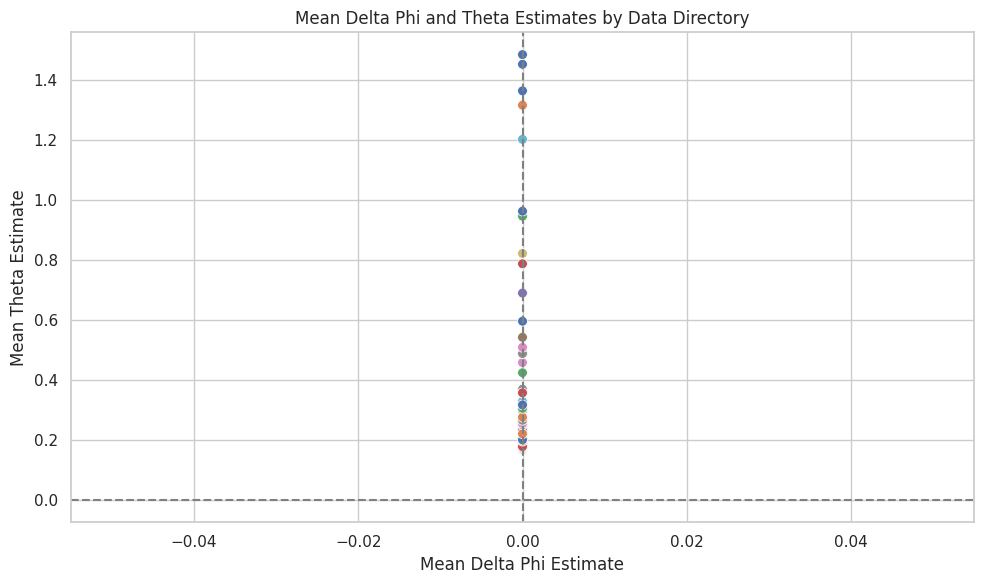

In [87]:
# plot the means as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("delta_phi", "mean"),
                y=("delta_phi_estimate", "mean"),
                hue=estimates_summary_df["N"]["mean"].astype(str),
                palette="deep", s=50)
plt.title("Mean Delta Phi and Theta Estimates by Data Directory")
plt.xlabel("Mean Delta Phi Estimate")
plt.ylabel("Mean Theta Estimate")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# no legend
plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_delta_phi_theta_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

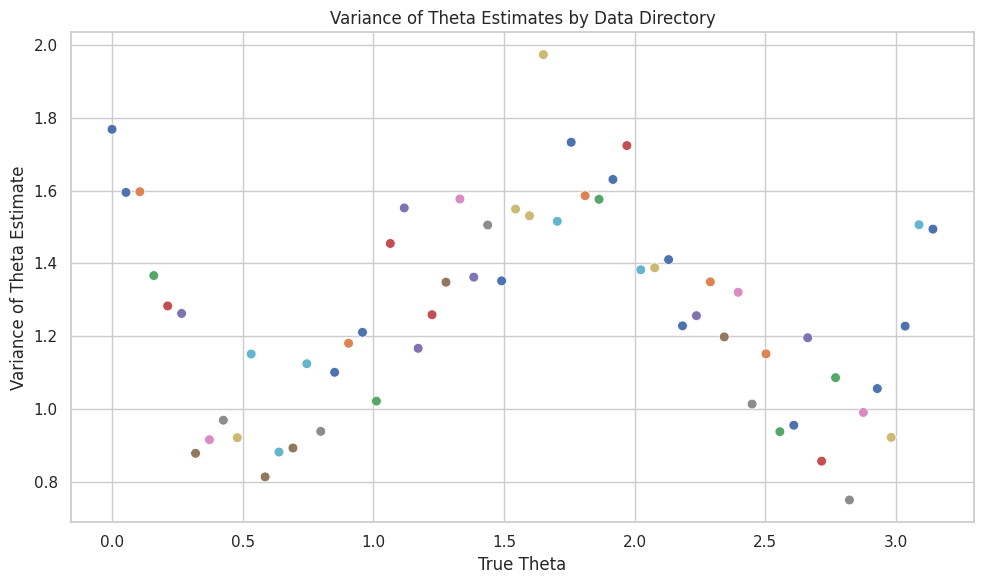

In [88]:
# plot the variances against the true value of theta as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"), y=("2_n_var"),
                  # N
                hue=estimates_summary_df["N"]["mean"].astype(str),
                palette="deep", s=50)
plt.title("Variance of Theta Estimates by Data Directory")
plt.xlabel("True Theta")
plt.ylabel("Variance of Theta Estimate")

plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "variance_theta_delta_phi_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()